In [1]:
import os
import numpy as np
import pandas as pd
import SimpleITK as sitk
import matplotlib.pyplot as plt
from skimage import morphology, filters, exposure, util, measure, segmentation
from scipy import ndimage

In [2]:
def window_transform(ct_array, windowWidth, windowCenter, normal=False):
    """
    return: trucated image according to window center and window width
    and normalized to [0,1]
    """
    minWindow = float(windowCenter) - 0.5*float(windowWidth)
    # print(minWindow)
    newimg = (ct_array - minWindow) / float(windowWidth)
    newimg[newimg < 0] = 0
    newimg[newimg > 1] = 1
    if not normal:
        newimg = (newimg * 255).astype('uint8')
    return newimg

In [3]:
def mask_to_onehot(mask, palette):
    """
    Converts a segmentation mask (H, W, C) to (H, W, K) where the last dim is a one
    hot encoding vector, C is usually 1 or 3, and K is the number of class.
    """
    semantic_map = []
    for colour in palette:
        equality = np.equal(mask, colour)
        class_map = np.all(equality, axis=-1)
        semantic_map.append(class_map)
    semantic_map = np.stack(semantic_map, axis=-1).astype(np.float32)
    return semantic_map

def onehot_to_mask(mask, palette):
    """
    Converts a mask (H, W, K) to (H, W, C)
    """
    x = np.argmax(mask, axis=-1)
    colour_codes = np.array(palette)
    x = np.uint8(colour_codes[x.astype(np.uint8)])
    return x

In [4]:
def get_data_and_mask(data, label, colors, ignore_idx=[], is_show=False):
    # label must be a channel last image
    assert len(label.shape) == 3, "label must be shape like (x, x, x)"
    
    RGB_img = np.zeros(shape=(label.shape[0], label.shape[1], 3))
    
    for c in range(label.shape[-1]):
        RGB_img[:, :, 0] += label[:, :, c] * colors[c][0]
        RGB_img[:, :, 1] += label[:, :, c] * colors[c][1]
        RGB_img[:, :, 2] += label[:, :, c] * colors[c][2]
    return RGB_img

In [5]:
def show_img(img, cmap=None, title=None):
    plt.figure(dpi=100)
    # plt.margins(0,0)
    # plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0,wspace=0)
    plt.title(label=title)
    if cmap:
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(img)
    plt.axis('off')
    # plt.savefig("img-test.png", dpi=150)
    plt.show()

### COVID-19-CT-110数据集

In [2]:
ct_path = "F:\\ROOT\\pyproject\\covid_new\\data_example\\seg\\ct_scans\\tr_im.nii.gz"
infection_path = "F:\\ROOT\\pyproject\\covid_new\\data_example\\seg\\infection_masks\\tr_im.nii.gz"

In [6]:
ct = sitk.ReadImage(ct_path)
ct_array = sitk.GetArrayFromImage(ct)
ct_array = window_transform(ct_array * 1.0, 1500, -650)
infection_mask = sitk.ReadImage(infection_path)
infection_mask_arr = sitk.GetArrayFromImage(infection_mask)

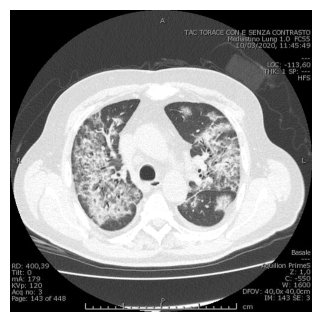

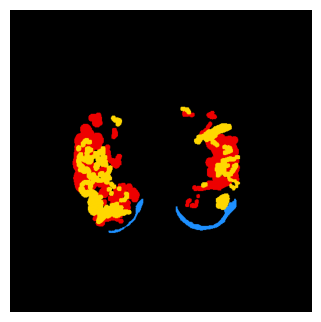

In [65]:
idx = 77
single_mask = np.expand_dims(infection_mask_arr[idx], axis=-1)
ret = mask_to_onehot(single_mask, palette=[[0],[1],[2],[3]])
color_map = [[0, 0, 0], [238, 0, 0],[255, 215, 0], [30, 144, 255]]
RGB_img = get_data_and_mask(None, ret, color_map)
show_img(ct_array[idx], cmap="gray")
show_img(RGB_img/255.0)

### COVID-19-CT-Seg_20Cases

In [6]:
ct_path = "E:\\dataset\\COVID-19-CT-Seg_20cases\\ct_scans\\coronacases_009.nii.gz"
infection_path = "E:\\dataset\\COVID-19-CT-Seg_20cases\\Lung_and_Infection_Mask\\coronacases_009.nii.gz"

In [7]:
ct = sitk.ReadImage(ct_path)
ct_array = sitk.GetArrayFromImage(ct)
ct_array = window_transform(ct_array * 1.0, 1500, -650)
infection_mask = sitk.ReadImage(infection_path)
infection_mask_arr = sitk.GetArrayFromImage(infection_mask)

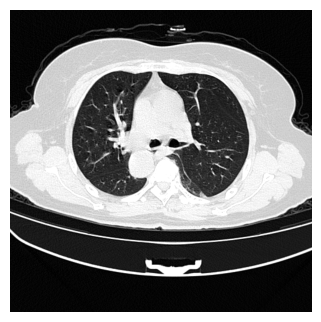

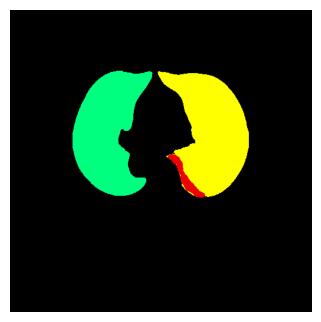

In [96]:
idx = 147
single_mask = np.expand_dims(infection_mask_arr[idx], axis=-1)
ret = mask_to_onehot(single_mask, palette=[[0],[1],[2],[3]])
color_map = [[0, 0, 0],[0, 255, 127], [255, 255, 0], [238, 0, 0]]
RGB_img = get_data_and_mask(None, ret, color_map)
ct_img = ct_array[idx]
ct_img = np.rot90(ct_img, 2)
show_img(ct_img, cmap="gray")
RGB_img = np.rot90(RGB_img, 2)

show_img(RGB_img/255.0)

### MosMedData数据集

In [15]:
ct_path = "E:\\dataset\\COVID-19-50\\ct_scans\\study_0281.nii.gz"
infection_path = "E:\\dataset\\COVID-19-50\\infection_masks\\study_0281_mask.nii.gz"

In [16]:
ct = sitk.ReadImage(ct_path)
ct_array = sitk.GetArrayFromImage(ct)
ct_array = window_transform(ct_array * 1.0, 1500, -650)
infection_mask = sitk.ReadImage(infection_path)
infection_mask_arr = sitk.GetArrayFromImage(infection_mask)

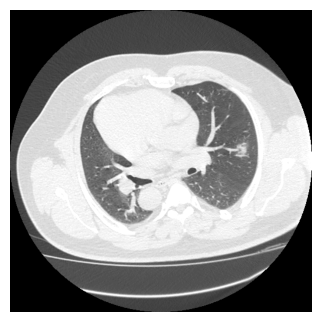

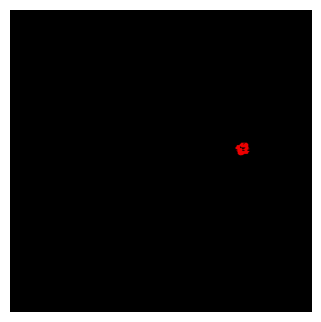

In [114]:
idx = 35
single_mask = np.expand_dims(infection_mask_arr[idx], axis=-1)
ret = mask_to_onehot(single_mask, palette=[[0],[1],[2],[3]])
color_map = [[0, 0, 0], [238, 0, 0],[0, 255, 127], [255, 255, 0], [238, 0, 0]]
RGB_img = get_data_and_mask(None, ret, color_map)
ct_img = ct_array[idx]
ct_img = np.rot90(ct_img, 2)
show_img(ct_img, cmap="gray")
RGB_img = np.rot90(RGB_img, 2)

show_img(RGB_img/255.0)

### CC-CCII数据集

In [23]:
import cv2
from PIL import Image

(512, 512)


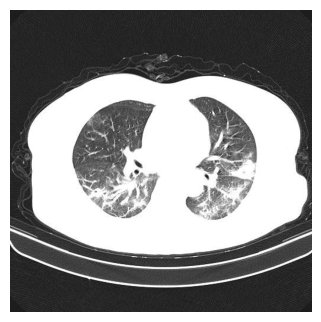

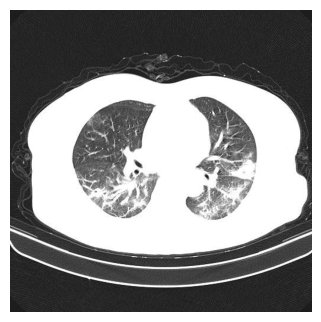

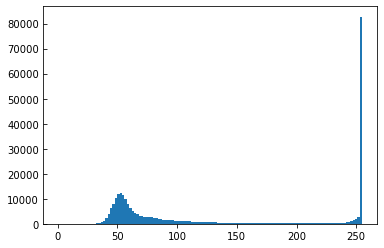

In [24]:
idx = 107
slice_idx = 64
img = Image.open("E:\\dataset\\ct_lesion_seg\\image\\{}\\{}.jpg".format(idx, slice_idx))

gray_img = img.convert('L')

# 将图像转换为Numpy数组
img_arr = np.array(gray_img)
print(img_arr.shape)
show_img(img_arr, cmap="gray")

img = Image.open("E:\\dataset\\ct_lesion_seg\\mask\\{}\\{}.png".format(idx, slice_idx))

# gray_img = img.convert('L')

plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.direction'] = 'out'

# 将图像转换为Numpy数组
img_arr = np.array(img)
single_mask = np.expand_dims(img_arr, axis=-1)
ret = mask_to_onehot(single_mask, palette=[[0],[1],[2],[3]])
color_map = [[0, 0, 0],[0, 255, 127], [238, 0, 0], [123, 104, 238]]
RGB_img = get_data_and_mask(None, ret, color_map)
show_img(RGB_img/255.0)
plt.imshow(rgb_img, alpha=0.3)